<a href="https://colab.research.google.com/github/expectnothin/asrkr-ml-py/blob/main/asrkr_housing_xgboostReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
✅ RMSE: 0.2628


<Figure size 800x600 with 0 Axes>

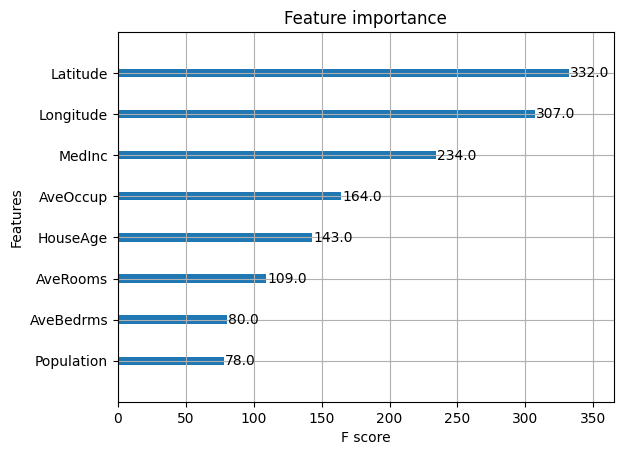

Sample predictions vs true values:
[[0.46539971 0.477     ]
 [0.96143258 0.458     ]
 [4.30744553 5.00001   ]
 [2.45486712 2.186     ]
 [2.31228185 2.78      ]]
Model saved to xgb_california.model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:20:08] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [2]:
# 1️⃣ Install XGBoost
!pip install -q xgboost

# 2️⃣ Imports
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 3️⃣ Load & prepare dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
print(df.head())

# 4️⃣ Split into train/test
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# 5️⃣ Train XGBRegressor
model = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=100,
                         learning_rate=0.1,
                         max_depth=4,
                         random_state=42)
model.fit(X_train, y_train)

# 6️⃣ Evaluate model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print(f"✅ RMSE: {rmse:.4f}")

# 7️⃣ Feature importance
plt.figure(figsize=(8,6))
xgb.plot_importance(model, max_num_features=10)
plt.show()

# 8️⃣ Sample predictions
print("Sample predictions vs true values:")
sample = X_test.iloc[:5]
preds = model.predict(sample)
print(np.column_stack([preds, y_test.iloc[:5]]))

# 9️⃣ Save the model
model.save_model("xgb_california.model")
print("Model saved to xgb_california.model")
